In [1]:
!pip3 install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data, meta = arff.loadarff('breast-cancer.arff')

In [4]:
converters = dict()
_ = [converters.update({column:dtype}) for column,dtype in zip(meta.names(),meta.types())]

In [5]:
df = pd.DataFrame(data=data, columns=meta.names())

In [6]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,"b""'40-49'""","b""'premeno'""","b""'15-19'""","b""'0-2'""","b""'yes'""","b""'3'""","b""'right'""","b""'left_up'""","b""'no'""","b""'recurrence-events'"""
1,"b""'50-59'""","b""'ge40'""","b""'15-19'""","b""'0-2'""","b""'no'""","b""'1'""","b""'right'""","b""'central'""","b""'no'""","b""'no-recurrence-events'"""
2,"b""'50-59'""","b""'ge40'""","b""'35-39'""","b""'0-2'""","b""'no'""","b""'2'""","b""'left'""","b""'left_low'""","b""'no'""","b""'recurrence-events'"""
3,"b""'40-49'""","b""'premeno'""","b""'35-39'""","b""'0-2'""","b""'yes'""","b""'3'""","b""'right'""","b""'left_low'""","b""'yes'""","b""'no-recurrence-events'"""
4,"b""'40-49'""","b""'premeno'""","b""'30-34'""","b""'3-5'""","b""'yes'""","b""'2'""","b""'left'""","b""'right_up'""","b""'no'""","b""'recurrence-events'"""


# Dataframe overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
age            286 non-null object
menopause      286 non-null object
tumor-size     286 non-null object
inv-nodes      286 non-null object
node-caps      286 non-null object
deg-malig      286 non-null object
breast         286 non-null object
breast-quad    286 non-null object
irradiat       286 non-null object
Class          286 non-null object
dtypes: object(10)
memory usage: 22.4+ KB


In [8]:
print("Number of categorical features %i" %df.select_dtypes(include=['object']).shape[1])
print("Number of numerical features %i" %df.select_dtypes(include=['float']).shape[1])

Number of categorical features 10
Number of numerical features 0


# Univariate analysis

## Null-values check

In [10]:
print("Nulls found: %i " %df.isnull().values.sum())

Nulls found: 0 


## Frequency distributions

Looking at the following charts, we realize that information is not balanced at all.

Here we have a decision to make: How do we deal with not balanced data?

In [12]:
def plot_all_cat_distributions(dataframe):
    """ Plot every single category frequency distribution in the same cell"""
    max_shape = np.ceil(dataframe.shape[1] / 2)
    fig = plt.figure(figsize=(20,40))
    for i, col in enumerate(dataframe.columns):
        plt.subplot(max_shape, 2, i+1)
        _ = sns.countplot(y = col, data = dataframe, order=dataframe[col].value_counts().index)
    plt.show()

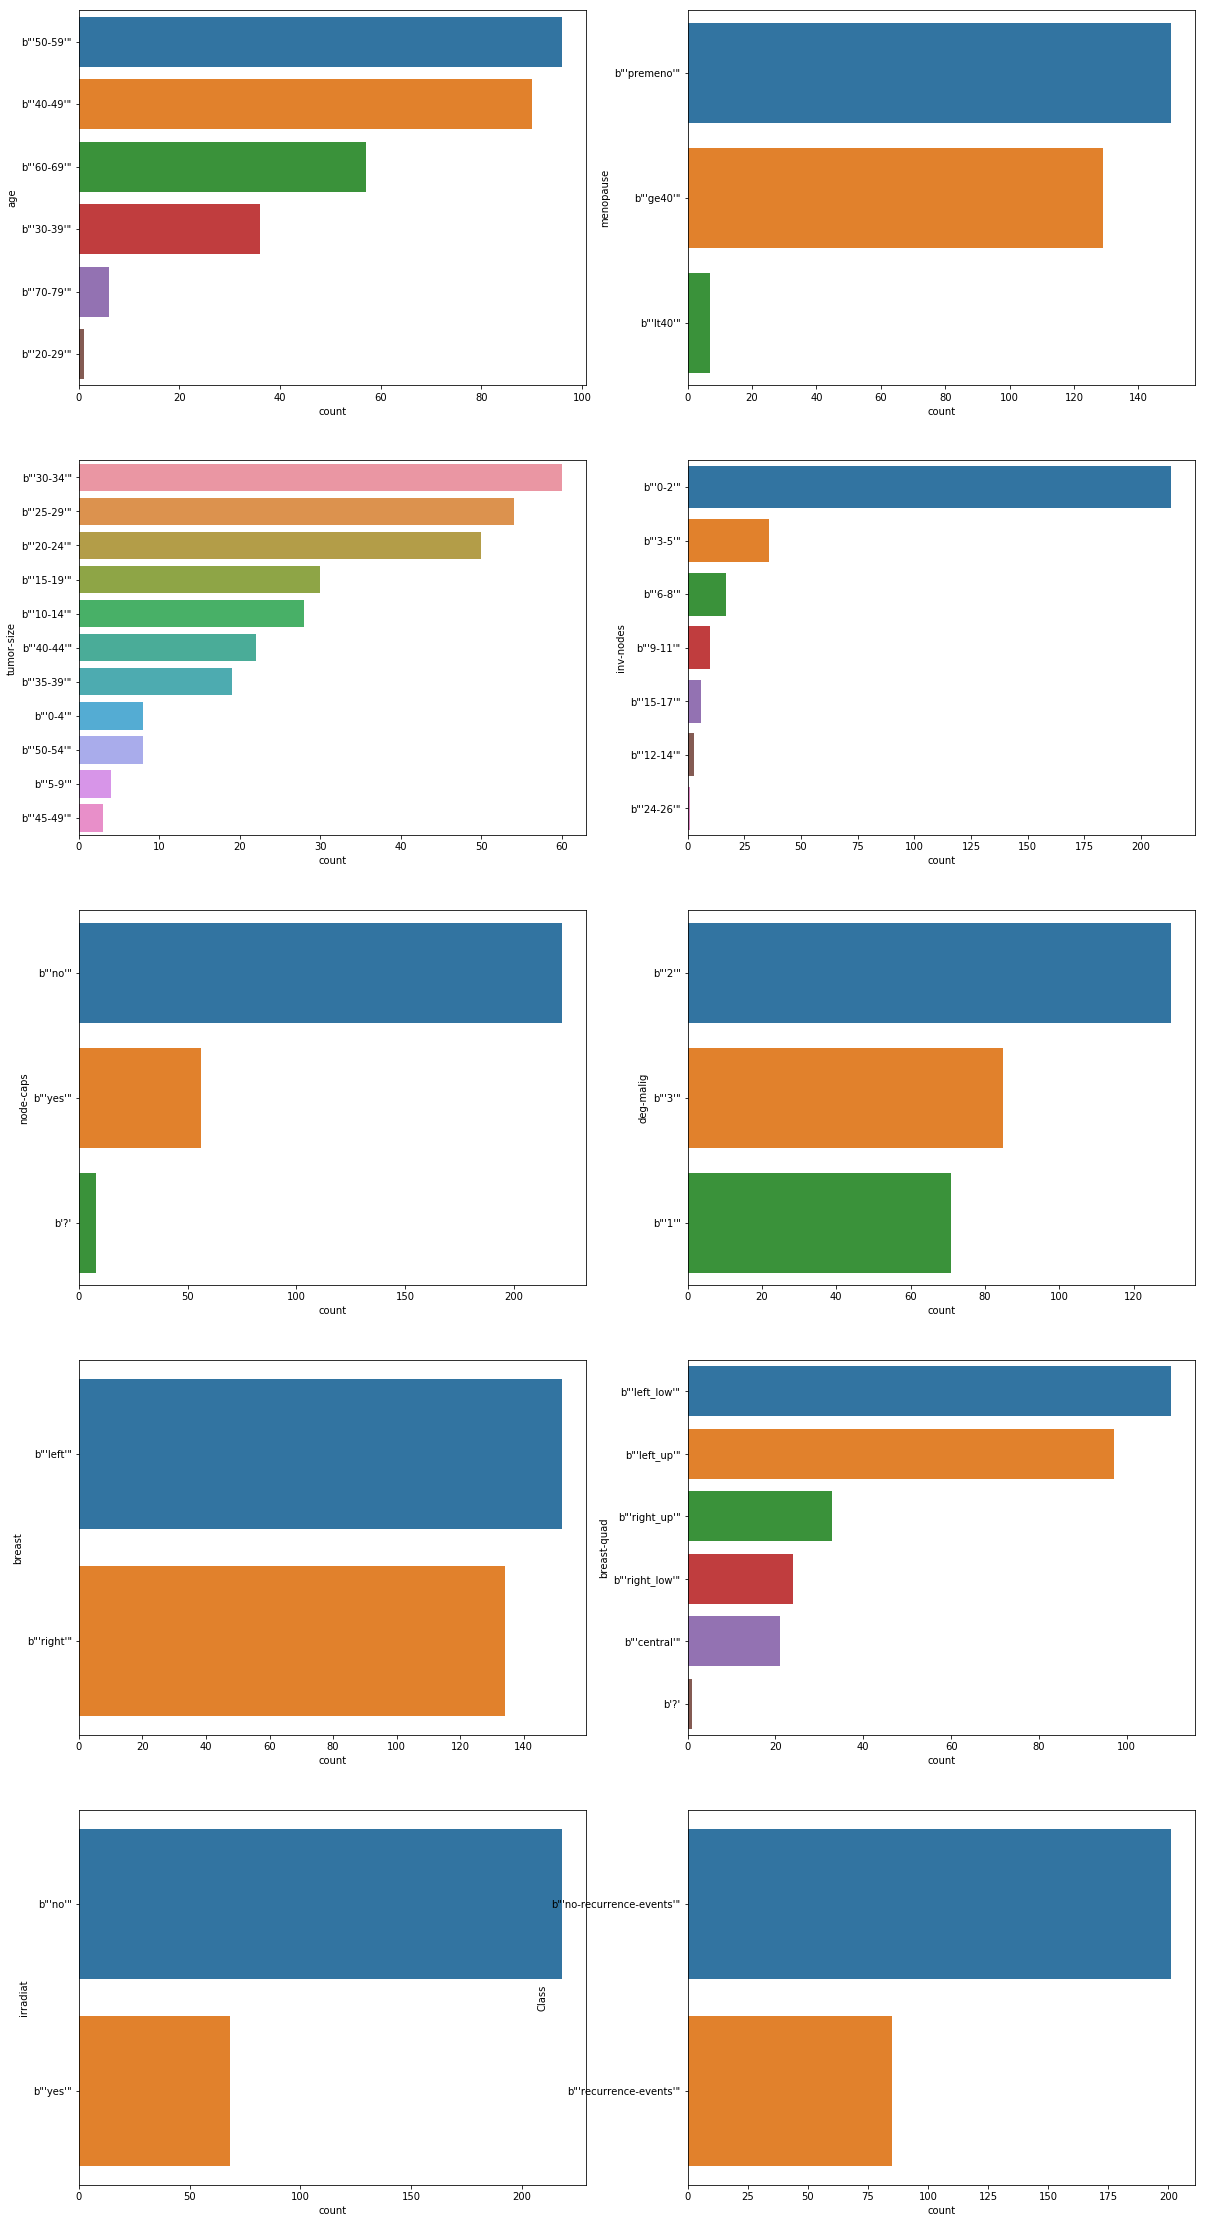

In [13]:
plot_all_cat_distributions(df)